In [2]:
%matplotlib inline
import scipy.io as sio
import numpy as np
import boltons.statsutils as bs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
vals = sio.loadmat('A2.mat')
A2 = vals['A2']
indep,dep = A2[:,0],A2[:,1]
mean = np.mean(dep)
median = np.median(dep)
depl=dep.tolist()
trimean=bs.trimean(depl)
MAD = bs.median_abs_dev(depl)
IQR = bs.iqr(depl)
std = np.std(dep)
data = pd.DataFrame()
data['year'] = indep
data['value'] = dep
sns.set_style("whitegrid")

print mean
print median
print trimean
print MAD
print IQR
print std

1.9606
1.72
1.79625
0.545
1.105
1.10465815527


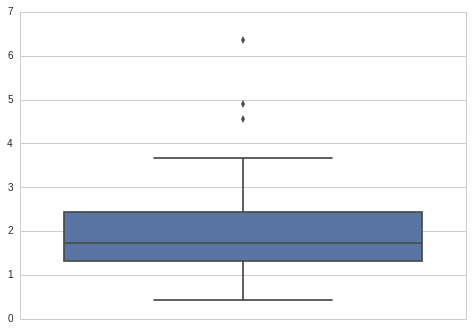

In [4]:
sns.boxplot(y=dep)

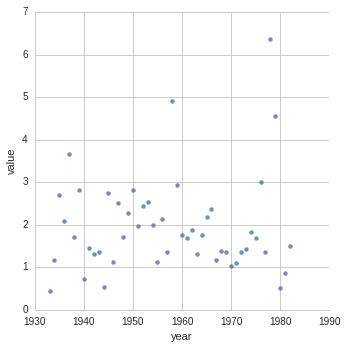

In [9]:
sns.lmplot('year','value', data=data, fit_reg=False)

In [5]:
import scipy.stats as sp

print sp.pearsonr(indep,dep)
print sp.spearmanr(indep,dep)


(0.077089661031147991, 0.59464852315497652)
SpearmanrResult(correlation=-0.049037030826635332, pvalue=0.73522937860313209)


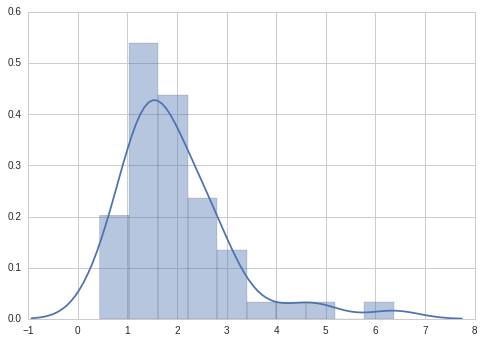

In [21]:
sns.distplot(dep)

In [7]:
autocor=np.correlate(dep, dep, mode='full')[len(dep)-1:]
print autocor

[ 253.2111  201.7277  193.1031  181.3808  174.5105  156.8739  159.5606
  149.7773  154.416   145.1497  147.9259  146.3489  145.2164  151.2343
  140.2565  135.2075  133.2162  131.5917  122.211   126.6766  134.1774
  124.0528  108.0532  107.892   100.9659   94.9357   91.9685   85.9939
   83.9659   83.827    70.5462   70.6514   58.4491   57.9939   49.1916
   44.5067   43.7487   47.9945   38.8581   49.2453   45.9635   49.1402
   42.2796   37.1819   27.2175   16.9068    8.0967    5.3173    2.1646
    0.6644]


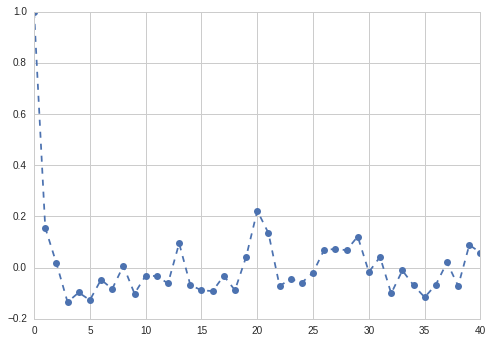

In [14]:
from statsmodels.tsa.stattools import acf

autocorr = acf(dep)

plt.plot(autocorr,marker='o',linestyle='--')

In [15]:
sp.zscore(dep)

array([-1.37653444, -0.70664395,  0.66029477,  0.10808774,  1.53839447,
       -0.21780494,  0.77797823, -1.12306236, -0.45317187, -0.59801306,
       -0.55275019, -1.2860087 ,  0.70555764, -0.75190682,  0.48829586,
       -0.21780494,  0.28008665,  0.77797823,  0.01756199,  0.43398041,
        0.51545358,  0.03566714, -0.76095939,  0.15335061, -0.54369761,
        2.66091368,  0.88660912, -0.19064721, -0.24496266, -0.07296375,
       -0.58896048, -0.18159464,  0.18956091,  0.37966497, -0.7247491 ,
       -0.51653989, -0.54369761, -0.84243256, -0.77001197, -0.55275019,
       -0.47127702, -0.10917405, -0.24496266,  0.94092457, -0.54369761,
        3.9916421 ,  2.34407358, -1.30411385, -0.98727375, -0.407909  ])